In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class Door:
    def __init__(self,goat=False,car=False):
        self.selected = False
        self.goat = goat
        self.car = car
        
class monty_hall_problem:
    def __init__(self,num_doors=3):
        self.doors = [Door() for i in range(num_doors)]
        self.hidden_doors = []
        self.randomize()
        
    def randomize(self):  # Refreshes and randomizes all data
        self.hidden_doors = []
        for d in self.doors:
            d.car=False
            d.goat = False
            d.selected = False
            self.hidden_doors.append(d)
        np.random.choice(self.doors).car = True
        for d in self.doors:
            if d.car:
                continue
            else:
                d.goat = True
                
    def select(self,door):  # Sets given door as selected
        self.doors[door].selected = True
        return self.doors[door]
        
    def reveal_goats(self): # removes all but one door other than the selected door. 
        goats = [g for g in self.hidden_doors if g.goat]
        reserve_goat = np.random.choice(goats)
        self.hidden_doors[:] = [door for door in self.hidden_doors if not self.determine_if_goat(door)]
        if len(self.hidden_doors) != 2:
            self.hidden_doors.append(reserve_goat)
        
    def determine_if_goat(self,door): # used in above function
        if door.car or door.selected:
            return False
        else:
            return True
            
    def swap(self):  # Swaps the selected status between last remaining hidden doors.
        for d in self.hidden_doors:
            if d.selected:
                d.selected = False
            else:
                d.selected = True
        for door in self.hidden_doors:
            if door.selected:
                return door


In [3]:
monty = monty_hall_problem()

dict_items([('Door 1', 323), ('Door 2', 349), ('Door 3', 328)])

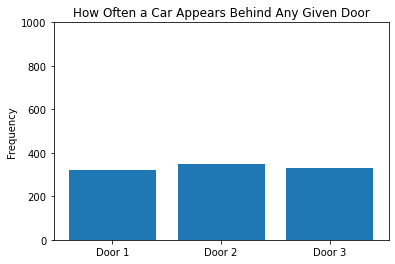

In [4]:
values_dict = {"Door 1": 0,
               "Door 2": 0,
               "Door 3": 0}
for i in range(1000):
    monty.randomize()
    if monty.doors[0].car:
        values_dict["Door 1"] += 1
    if monty.doors[1].car:
        values_dict["Door 2"] += 1
    if monty.doors[2].car:
        values_dict["Door 3"] += 1
plt.bar(values_dict.keys(),values_dict.values())
plt.ylim(0,1000)
plt.ylabel('Frequency')
plt.title("How Often a Car Appears Behind Any Given Door")
display(values_dict.items())

dict_items([('car', 334), ('goat', 666)])

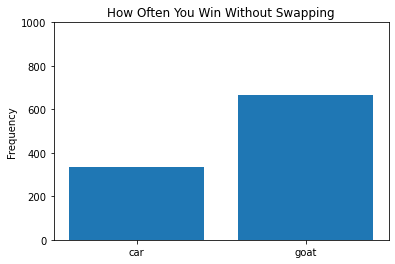

In [5]:
results_dict = {'car':0,
                'goat':0}
for i in range(1000):
    monty.randomize()
    chosen_door = monty.select(0)
    monty.reveal_goats()
    if chosen_door.car:
        results_dict['car'] += 1
    else:
        results_dict['goat'] += 1
plt.bar(results_dict.keys(),results_dict.values())
plt.ylim(0,1000)
plt.ylabel('Frequency')
plt.title("How Often You Win Without Swapping")
display(results_dict.items())

dict_items([('car', 669), ('goat', 331)])

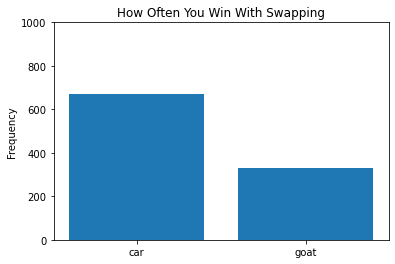

In [7]:
results_dict = {'car':0,
                'goat':0}
for i in range(1000):
    monty.randomize()
    chosen_door = monty.select(0)
    monty.reveal_goats()
    chosen_door = monty.swap()
    if chosen_door.car:
        results_dict['car'] += 1
    else:
        results_dict['goat'] += 1
plt.bar(results_dict.keys(),results_dict.values())
plt.ylim(0,1000)
plt.ylabel('Frequency')
plt.title("How Often You Win With Swapping")
display(results_dict.items())

dict_items([('car', 8), ('goat', 992)])

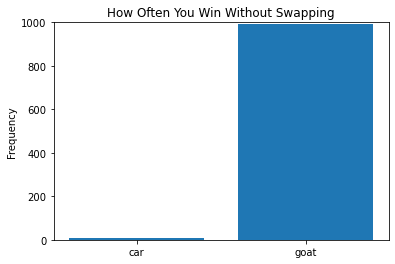

In [9]:
monty_100 = monty_hall_problem(100)
results_dict = {'car':0,
                'goat':0}
for i in range(1000):
    monty_100.randomize()
    chosen_door = monty_100.select(42)
    monty_100.reveal_goats()
    if chosen_door.car:
        results_dict['car'] += 1
    else:
        results_dict['goat'] += 1
plt.bar(results_dict.keys(),results_dict.values())
plt.ylim(0,1000)
plt.ylabel('Frequency')
plt.title("How Often You Win Without Swapping")
display(results_dict.items())

dict_items([('car', 987), ('goat', 13)])

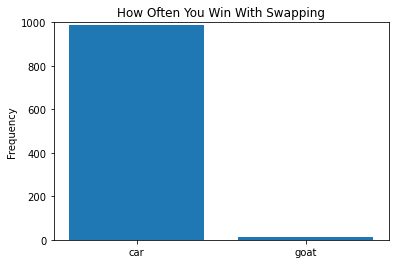

In [11]:
results_dict = {'car':0,
                'goat':0}
for i in range(1000):
    monty_100.randomize()
    chosen_door = monty_100.select(42)
    monty_100.reveal_goats()
    chosen_door = monty_100.swap()
    if chosen_door.car:
        results_dict['car'] += 1
    else:
        results_dict['goat'] += 1
plt.bar(results_dict.keys(),results_dict.values())
plt.ylim(0,1000)
plt.ylabel('Frequency')
plt.title("How Often You Win With Swapping")
display(results_dict.items())